## Rigid Body Euler Forward Method

This code calculates a projectiles path with inertial drag in the air.

In [2]:
# Import libraries here first before running anything else

# comment or remove the line below if you don't have the interactive plot library
%matplotlib ipympl  

import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate # library used to print out data in nice tables

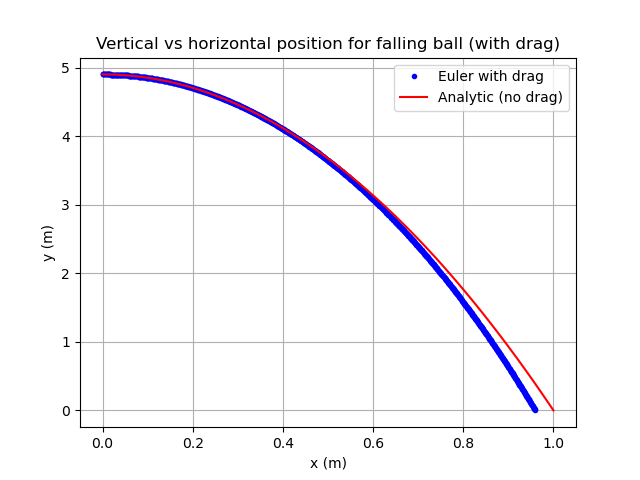

In [3]:
"""
A simple Euler exercise: trajectory of a sphere in 2D 
"""
# Define constants
g = 9.806    # set the acceleration due to gravity at UBC (m/s^2)
a = 0.1      # radius of ball (m)
pi = np.pi
A = pi*a**2   # frontal area of ball
rho_air = 1.2 # density of air (kg/m^3)
rho_ball = 50 # density of styrofoam (kg/m^3)
m_ball = 4*pi/3*a**3*rho_ball # mass of ball (kg)
#print(m_ball)
CD = 0.5      # coefficient of inertial drag

# Initial conditions
x = 0       # initial x (m)
y = 4.903   # initial y (m) 
vx = 1      # initial velocity (m/s)
vy = 0      # initial velocity (m/s)
t = 0.0      # start the simulation at t = 0
ax= 0        # initialize acceleration (zero velocity)
ay= -g       # initialize acceleration (zero velocity)

# Time step (s)
dt = 0.001    

# initalize some lists for plotting
xdata = []
vxdata = []
ydata = []
vydata = []
tdata = []

# Make arrays to plot the analytic NO DRAG solution based on initial conditions
fall_time = vy/g + (vy**2/g**2 + 2*y/g)**0.5
t_an = np.linspace(0,fall_time,100) # makes an array of 100 times from 0 to fall_time
x_an = x + vx*t_an                 # makes an array of positions x_an at each time
y_an = y + vy*t_an - 0.5*g*t_an**2 # makes an array of positions y_an at each time
# print('fall_time',fall_time)
# print(t_an,y_an)

# Run the Euler simulation in a while loop

while y >= 0:
    xdata.append(x)     # store the current x position
    vxdata.append(vx)   # store current x velocity
    ydata.append(y)     # store the current y position
    vydata.append(vy)   # store current y velocity
    tdata.append(t)     # store current time
    
    x = x + vx*dt          # Update the position in the x direction
    y = y + vy*dt          # Update the position in the y direction
    vx = vx + ax*dt        # Update the velocity in the x direction
    vy = vy + ay*dt        # Update the velocity in the y direction
    v = (vx**2+vy**2)**0.5 # magnitude of velocity
    FDx = 0.5*CD*rho_air*A*v*vx  # force of drag in x-direction
    FDy = 0.5*CD*rho_air*A*v*vy  # force of drag in y-direction
    ax = -FDx/m_ball                 # drag modified acceleration
    ay = -g-FDy/m_ball               # drag modified acceleration
    t = t + dt             # Increment the time by the time step
#    print(t,x,vx,ax)
#    print(t,y,vy,ay)

# Make the plots
plt.figure()
plt.plot(xdata,ydata, "b.", label="Euler with drag")
plt.plot(x_an ,y_an, "r", label="Analytic (no drag)")
plt.title("Vertical vs horizontal position for falling ball (with drag)")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.legend()
plt.grid(True)
plt.show()

## Fluid Droplet Euler Forward Method

droplet mass is 4.19e-06 g



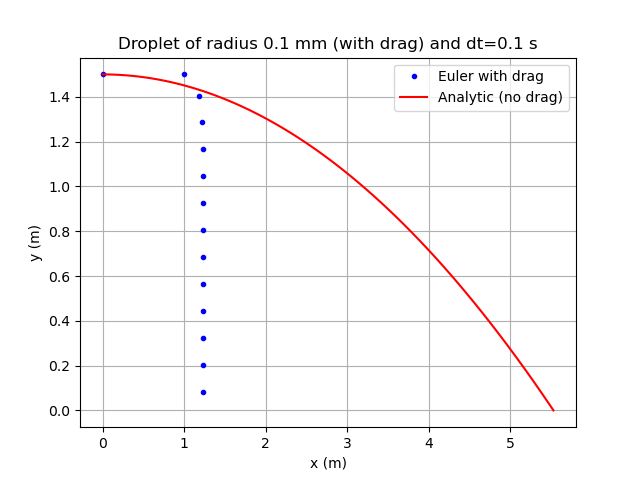

In [4]:
"""
A simple Euler exercise: trajectory of a sneeze droplet in 2D 
"""
# Define constants
g = 9.806    # set the acceleration due to gravity at UBC (m/s^2)
a = 0.1e-3      # radius of sneeze droplet (m)
pi = np.pi
A = pi*a**2   # frontal area of droplet
rho_air = 1.2 # density of air (kg/m^3)
rho_drop = 1000 # density of water (kg/m^3)
m_drop = 4*pi/3*a**3*rho_drop # mass of droplet (kg)
print("droplet mass is {:.2e} g\n".format(m_drop*1000)) #print droplet mass with one decimal point for reference, note that the \n is added to the end of the string to create a line skip (for pretty spacing!)
visc = 1.81e-5 # coefficient of viscosity of air at 15deg

# Initial conditions
x = 0       # initial x (m)
y = 1.5   # initial y (m) 
vx = 10      # initial velocity (m/s)
vy = 0      # initial velocity (m/s)
t = 0.0      # start the simulation at t = 0
ax = -6*pi*visc*a*vx/m_drop        # initialize acceleration (vx is non-zero initially)
ay = -g       # initialize acceleration (zero vy initially)

# Time step
dt = 0.1    

# initalize some lists for plotting and printing
xdata = []
vxdata = []
axdata = []

ydata = []
vydata = []
aydata = []

tdata = []
tablex=[]
tabley=[]

# Make arrays to plot the analytic NO DRAG solution based on initial conditions
fall_time = vy/g + (vy**2/g**2 + 2*y/g)**0.5
t_an = np.linspace(0,fall_time,100) # makes an array of 100 times from 0 to fall_time
x_an = x + vx*t_an                 # makes an array of positions x_an at each time
y_an = y + vy*t_an - 0.5*g*t_an**2 # makes an array of positions y_an at each time
# print('fall_time',fall_time)
# print(t_an,y_an)

# Run the Euler simulation in a while loop

while y >= 0:
    xdata.append(x)     # store the current x position
    vxdata.append(vx)   # store current x velocity
    axdata.append(ax)   # store current x accel
    
    ydata.append(y)     # store the current y position
    vydata.append(vy)   # store current y velocity
    aydata.append(ay)   # store current x accel
    
    tdata.append(t)     # store current time
    
    # # for printing nice tables with rounding everything to 3 decimal points except time
    # rowx = [x,vx,ax]
    # tablex.append([t]+[round(n,3) for n in rowx])
    # rowy = [y,vy,ay]
    # tabley.append([t]+[round(n,3) for n in rowy])
    
    # for printing nice tables without rounding 
    # tablex.append([t,x,vx,ax])
    # tabley.append([t,y,vy,ay])
        
    x = x + vx*dt          # Update the position in the x direction
    y = y + vy*dt          # Update the position in the y direction
    vx = vx + ax*dt        # Update the velocity in the x direction
    vy = vy + ay*dt        # Update the velocity in the y direction
    v = (vx**2+vy**2)**0.5 # magnitude of velocity
    FDx = -6*pi*visc*a*vx  # force of drag in x-direction
    FDy = -6*pi*visc*a*vy  # force of drag in y-direction
    ax = FDx/m_drop                 # drag modified acceleration
    ay = -g+FDy/m_drop               # drag modified acceleration
    t = t + dt             # Increment the time by the time step
    # print(t,y,vy,ay)

# # print some nice tables
# print(tabulate(tablex, headers=["time","x", "vx","ax"]))
# print('\n')
# print(tabulate(tabley, headers=["time","y", "vy","ay"]))
    
# Make the x vs y plots
plt.figure()
plt.plot(xdata,ydata, "b.", label="Euler with drag")
plt.plot(x_an ,y_an, "r", label="Analytic (no drag)")
# plt.xlim(0,1)
plt.title(f"Droplet of radius {a*1e3} mm (with drag) and dt={dt} s")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.legend()
plt.grid(True)
plt.show()